In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [0]:
ls

 BirthData2.xlsx                         LSTM_Grid_search.ipynb
'Copie de Bienvenue dans Colaboratory'   LSTM_model.ipynb
 distplot.png                            LSTM_model.py
 flowchart.png                           Sari1/
 Grid_search_shuffle.ipynb               Sari_NN_byRock.ipynb
 hybplot1.png                            Time_serie2.ipynb
 hybplot2.png                            ts.csv
'Hybrid_AR&LSTM_model.ipynb'             tsplot.png
 lstm1plot.png                           Untitled0.ipynb
 lstm3plot.png                           Untitled1.ipynb
 lstm4plot.png                           Untitled2.ipynb


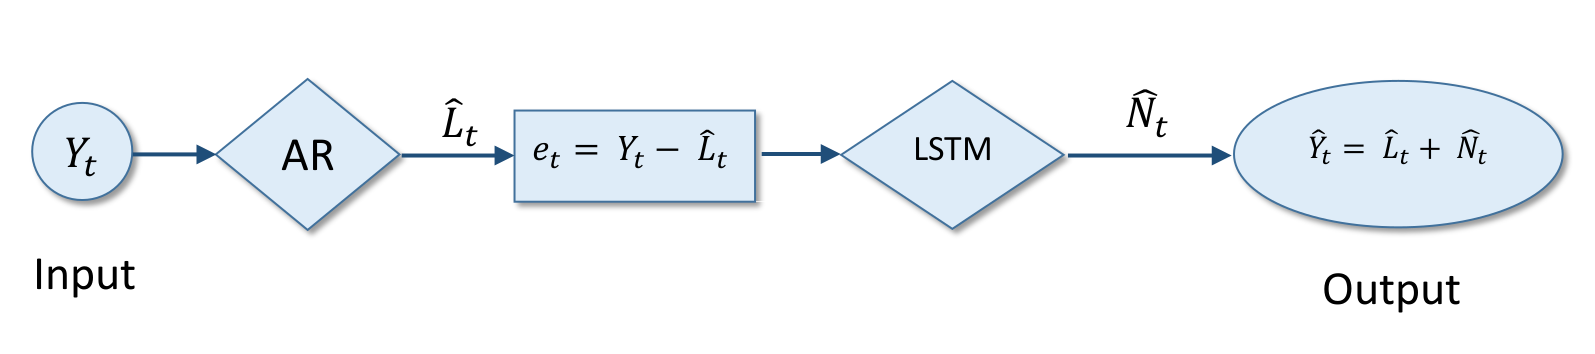

In [0]:
from IPython.display import Image
Image('flowchart.png')

Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 265 samples, validate on 67 samples
Epoch 1/100





265/265 [==============================] - 12s 44ms/step - loss: 0.1299 - val_loss: 0.0684
Epoch 2/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0277 - val_loss: 0.0180
Epoch 3/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 4/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 5/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 6/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 7/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 8/100
265/265 [==============================] - 5s 19ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 9/100
265/265 [===========

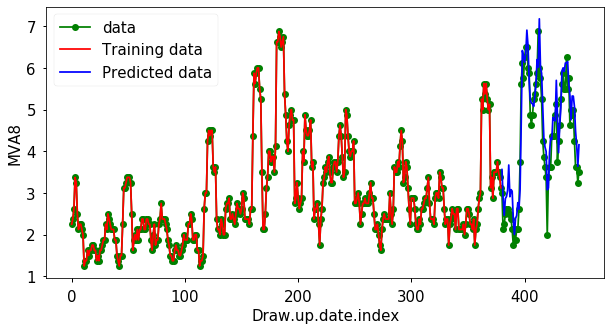

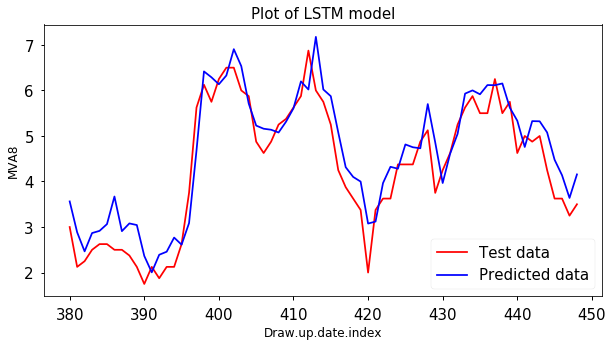

In [0]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error



from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd


import numpy as np                       
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
plt.style.use('seaborn-notebook')
import pylab

plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

SMALL_SIZE = 15
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def AR1(data):
    
    # split dataset
    X = data
    
    #train, test = X,X
    
    #train, test = X[0:380], X[380:449]
    train=X
    # train autoregression
    model = AR(train)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    # walk forward over time steps in test
    history = list(train[len(train)-window:])
    #history = [history[i] for i in range(len(history))]
    predict = list()
    for t in range(len(train)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = train[t]
        predict.append(yhat)
        history.append(obs)
        
        
        #print('predicted=%f, expected=%f' % (yhat, obs))
    return train, predict

def compute_residual(train,predict):
    residual=np.array(train)-np.array(predict)
    return residual


def preprocessing(training_set):
    
    training_set = training_set.reshape(-1,1)
    #feature scaling
    from sklearn.preprocessing import MinMaxScaler
    sc=MinMaxScaler(feature_range=(0,1))
    training_set_scaled= sc.fit_transform(training_set[0:380])
    test_set_scaled= sc.fit_transform(training_set[332:449])
    
    
    #Creating a data structure with 48 timesteps and 1 output
    #train
    X_train=[]
    Y_train=[]
    for i in range(48, len(training_set_scaled)):
        X_train.append(training_set_scaled[i-48:i,0])
        Y_train.append(training_set_scaled[i,0])
    X_train, Y_train=np.array(X_train), np.array(Y_train)
    
    #test
    X_test=[]
    Y_test=[]
    for i in range(48, len(test_set_scaled)):
        X_test.append(test_set_scaled[i-48:i,0])
        Y_test.append(test_set_scaled[i,0])
        
    X_test,Y_test=np.array(X_test),np.array(Y_test)
    
    #Reshaping
    X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
    X_test=np.array(X_test)
    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

    return X_train,Y_train,X_test,Y_test

#initialising the RNN

def model_LSTM(X_train,Y_train,dropout_prop=0.0,nb_units=10,batchsize=16,epoch=100,optimizer='adam'):
  regressor= Sequential()

  #adding the first LSTM layer and some dropout regularization
  regressor.add(LSTM(units=nb_units, return_sequences = True , input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(dropout_prop))

  #adding a third LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units=nb_units, return_sequences = True ))
  regressor.add(Dropout(dropout_prop))

  #adding a fourth LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units=nb_units ))
  regressor.add(Dropout(dropout_prop))

  #adding the output layer
  regressor.add(Dense(units=1))
  #Compiling the RNN

  regressor.compile(optimizer= optimizer, loss= 'mean_squared_error')


  #Fitting the RNN to the training se
  history=regressor.fit(X_train, Y_train,validation_split=0.20, epochs=epoch, batch_size=batchsize)
  history.history
  return regressor
def evaluate_error(model,X_test,Y_test):
  predicted_birth=model.predict(X_test)
  #Y_test=sc.inverse_transform(np.array(Y_test).reshape(-1,1))
  #predicted_birth=sc.inverse_transform(predicted_birth)
  errors = abs(predicted_birth - Y_test)
  MAE=round(np.mean(errors), 2)
  rmse =np.sqrt(mean_squared_error(Y_test,predicted_birth))
  #mape = 100 * (errors / Y_test)
  #MAPE=round(np.mean(mape), 2)
  return MAE,rmse



def train_model(X_train,Y_train):


    model_regressor=model_LSTM(X_train,Y_train,dropout_prop=0.0,nb_units=10,batchsize=16,epoch=100,optimizer='Adam')
    #rmse=evaluate_error(model=model_regressor,X_test=X_test,Y_test=Y_test)
    


    return model_regressor

def main():

    ts=pd.read_csv("ts.csv", delimiter=',')
    from datetime import datetime
    con=ts['Draw.up.date']
    ts['Draw.up.date']=pd.to_datetime(ts['Draw.up.date'])
    ts.set_index('Draw.up.date', inplace=True)
    #check datatype of index
    ts.index
    
    # weekly baseline
    ts['baseline'] = ts.daily_count.shift(1)
    
    # moving averages
    ts['MVA2'] = ts.daily_count.rolling(2).mean().shift(1)
    ts['MVA4'] = ts.daily_count.rolling(4).mean().shift(1)
    ts['MVA6'] = ts.daily_count.rolling(6).mean().shift(1)
    ts['MVA8'] = ts.daily_count.rolling(8).mean().shift(1)
    ts.head(9)
    
    ts.drop(ts.index[:8], inplace=True)
    ts.head(8)
    
    #distribution plot
    
    #Define the training set
    training_set = ts['MVA8'].values
    
    train,predict_val=AR1(training_set)
    
    residual= compute_residual(train,predict_val)
    
    X_train,Y_train,X_test,Y_test = preprocessing(residual)

    model1 = train_model(X_train,Y_train)
    
    RMSE,MAE=evaluate_error(model1,X_test,Y_test)
    
    print('RMSE: ',RMSE,' MAE: ',MAE)

    predicted_birth_residual=model1.predict(X_test)
    
    predicted_birth= predicted_birth_residual+ predict_val[380:449]
    
    
    print(X_test)
    print(Y_test)
    print(predicted_birth)
   # predicted_birth=sc.inverse_transform(predicted_birth)
    
    
    plt.figure(figsize=(10, 5))
    plt.plot(training_set,'o-',color='green',label='data')
    plt.plot(range(0,380),training_set[0:380], color='red', label='Training data')
    plt.plot(range(380,449) ,predicted_birth[0], color='blue', label='Predicted data')
    plt.xlabel('Draw.up.date.index', fontsize=15)
    plt.ylabel('MVA8', fontsize=15)
    plt.legend()
    #plt.savefig('hybplot1.png')
    plt.show()
    

    plt.figure(figsize=(10, 5))
    plt.title('Plot of LSTM model')
    plt.plot(range(380,449),training_set[380:449], color='red', label='Test data')
    plt.plot(range(380,449) ,predicted_birth[0], color='blue', label='Predicted data')
    plt.xlabel('Draw.up.date.index')
    plt.ylabel('MVA8')
    plt.legend()
    plt.savefig('hybplot2.png')
    plt.show()

    return training_set, predict_val[380:449],predicted_birth_residual
    
    
t,p,pb= main()

The hybrid model give the smallest error for prediction MAE=0.17 RMSE=0.15
than the prediction of the AR model and LSTM model separately 

In [0]:
#plot of test and predict
plt.figure(figsize=(10, 5))
plt.plot(range(380,449),Y_test, color='red', label='Test data')
plt.plot(range(380,449) ,predicted_birth, color='blue', label='Predicted data')
plt.xlabel('Draw.up.date.index')
plt.ylabel('MVA8')
plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()

NameError: ignored

<Figure size 720x360 with 0 Axes>